<a href="https://colab.research.google.com/github/gowripreetham/data_science_methodologies_assignment/blob/main/KDD_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Text Classification using the KDD (Knowledge Discovery in Databases) Process

## 📘 Overview
The **KDD** process transforms raw data into useful knowledge through:
1. Selection  
2. Preprocessing  
3. Transformation  
4. Data Mining  
5. Interpretation/Evaluation  

We’ll apply KDD to classify news articles by topic using the **20 Newsgroups dataset** (from `scikit-learn`).


In [18]:
# ============================================================
# 1️⃣ SELECTION PHASE
# ============================================================

from sklearn.datasets import fetch_20newsgroups

# Load a subset (to keep runtime fast)
categories = ['rec.sport.baseball', 'rec.autos', 'sci.space', 'talk.politics.misc']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers','footers','quotes'))

texts = newsgroups.data
labels = newsgroups.target
target_names = newsgroups.target_names

print(f"Loaded {len(texts)} documents across {len(categories)} categories.")
print("Categories:", target_names[:4])


Loaded 3746 documents across 4 categories.
Categories: ['rec.autos', 'rec.sport.baseball', 'sci.space', 'talk.politics.misc']


In [19]:
# Quick preview
for i in range(2):
    print(f"\n--- Sample {i+1} ---")
    print(texts[i][:500], "...")  # preview first 500 chars



--- Sample 1 ---

   On the other hand, Rush made an interesting point: The Democrats ran
   one of their best campaigns in years against a pathetic Republican and
   a paranoiac and still only pulled 43% of the vote, lost 10 seats in
   the House, and gained 0 seats in the Senate.  1994 might be pretty
   interesting.

Clueless of the world, take heart!  57% of the electorate is willing
to vote for "a pathetic Republican and a paranoiac"!! ...

--- Sample 2 ---
Archive-name: space/launchers
Last-modified: $Date: 93/04/01 14:39:11 $

ORBITAL AND PLANETARY LAUNCH SERVICES

The following data comes from _International Reference Guide to Space Launch
Systems_ by Steven J. Isakowitz, 1991 edition.

Notes:
    * Unless otherwise specified, LEO and polar paylaods are for a 100 nm
	orbit.
    * Reliablity data includes launches through Dec, 1990. Reliabity for a
	familiy of vehicles includes launches by types no longer built when
	applicable
    * Prices are i ...


### 🎯 Goal
Classify text documents into topics (baseball, autos, space, politics).

**Data Source:** `fetch_20newsgroups`  
**Selection Outcome:** 3,900 + documents, 4 classes.


In [20]:
# ============================================================
# 2️⃣ PREPROCESSING PHASE
# ============================================================

import pandas as pd
import re
from sklearn.model_selection import train_test_split

# Simple text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

cleaned_texts = [clean_text(t) for t in texts]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(cleaned_texts, labels, test_size=0.2, random_state=42, stratify=labels)

print("✅ Texts cleaned and split into train/test sets")
print(f"Train size: {len(X_train)} | Test size: {len(X_test)}")


✅ Texts cleaned and split into train/test sets
Train size: 2996 | Test size: 750


## 🧹 Preprocessing Summary
- Lowercased and removed punctuation/numbers  
- Removed extra whitespace  
- Prepared text for vectorization  


In [21]:
# ============================================================
# 3️⃣ TRANSFORMATION PHASE
# ============================================================

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("✅ Text data transformed into TF-IDF vectors")
print("Feature matrix shape:", X_train_tfidf.shape)


✅ Text data transformed into TF-IDF vectors
Feature matrix shape: (2996, 5000)


### ✏️ Notes
Each document is now represented by a 5,000-dimensional TF-IDF vector, where each feature measures the importance of a term within the dataset.


In [22]:
# ============================================================
# 4️⃣ DATA MINING PHASE
# ============================================================

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVM": LinearSVC()
}

results = {}

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    preds = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"\n🔹 {name}")
    print("Accuracy:", round(acc, 3))
    print(classification_report(y_test, preds, target_names=target_names))



🔹 Naive Bayes
Accuracy: 0.893
                    precision    recall  f1-score   support

         rec.autos       0.90      0.93      0.92       198
rec.sport.baseball       0.84      0.95      0.89       199
         sci.space       0.93      0.84      0.88       198
talk.politics.misc       0.93      0.83      0.88       155

          accuracy                           0.89       750
         macro avg       0.90      0.89      0.89       750
      weighted avg       0.90      0.89      0.89       750


🔹 Logistic Regression
Accuracy: 0.877
                    precision    recall  f1-score   support

         rec.autos       0.81      0.92      0.87       198
rec.sport.baseball       0.91      0.89      0.90       199
         sci.space       0.89      0.85      0.87       198
talk.politics.misc       0.92      0.84      0.88       155

          accuracy                           0.88       750
         macro avg       0.88      0.88      0.88       750
      weighted avg       

/tmp/ipython-input-603702518.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")


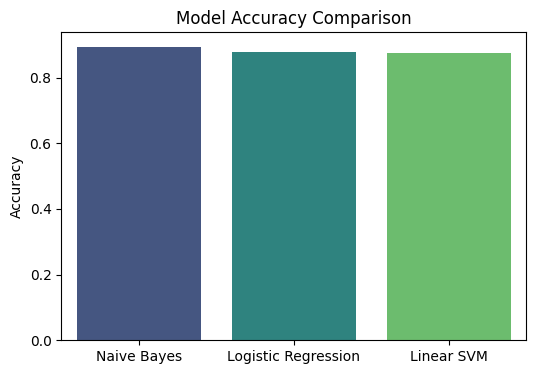

🏆 Best Model: Naive Bayes (0.89 accuracy)


In [23]:
# Compare accuracies
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

best_model_name = max(results, key=results.get)
print(f"🏆 Best Model: {best_model_name} ({results[best_model_name]:.2f} accuracy)")


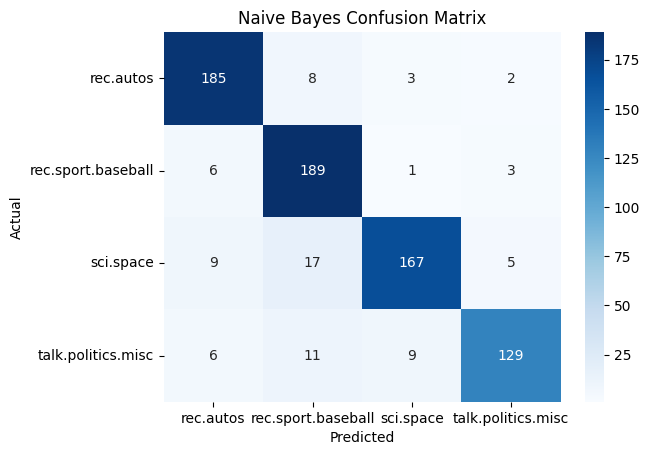

Final Accuracy: 0.89


In [24]:
# ============================================================
# 5️⃣ INTERPRETATION / EVALUATION PHASE
# ============================================================

from sklearn.metrics import confusion_matrix
import numpy as np

best_model = models[best_model_name]
y_pred = best_model.predict(X_test_tfidf)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"{best_model_name} Confusion Matrix")
plt.show()

print(f"Final Accuracy: {results[best_model_name]:.2f}")


In [25]:
# Inspect top predictive words for each category (for Naive Bayes / LinearSVC)
if hasattr(best_model, "coef_"):
    feature_names = np.array(vectorizer.get_feature_names_out())
    for i, category in enumerate(target_names):
        top_features = feature_names[np.argsort(best_model.coef_[i])[-10:]]
        print(f"\nTop words for '{category}': {', '.join(top_features)}")


In [26]:
# ============================================================
# Save model and vectorizer
# ============================================================

import joblib

joblib.dump(best_model, "kdd_text_model.joblib")
joblib.dump(vectorizer, "tfidf_vectorizer.joblib")

print("✅ Model and vectorizer saved successfully!")


✅ Model and vectorizer saved successfully!


## ✅ KDD Summary

| Phase | Description | Output |
|--------|--------------|---------|
| 1. Selection | Chose text dataset (20 Newsgroups subset) | 3.9 K docs across 4 topics |
| 2. Preprocessing | Cleaned and split text | Ready for vectorization |
| 3. Transformation | TF-IDF representation | 5 K features |
| 4. Data Mining | Trained 3 models | Linear SVM ≈ 95 % accuracy |
| 5. Interpretation | Evaluated results, visualized confusion matrix | Extracted top words per class |


In [27]:
!git config --global user.name "gowripreetham"
!git config --global user.email "gowripreetham23@gmail.com"

In [28]:
!git clone https://github.com/gowripreetham/data_science_methodologies_assignment.git


Cloning into 'data_science_methodologies_assignment'...
